In [80]:
from Py6S import *
import numpy as np

In [81]:
# Ocean parameters
wind_speed = 10
wind_direction = 50
salinity = 34.3
pigmentation = 0.3

In [82]:
# Creating a test bed for ocean reflectance in 6s
s = SixS()
s.aero_profile = AeroProfile.PredefinedType(AeroProfile.NoAerosols)
s.atmos_profile = AtmosProfile.PredefinedType(AtmosProfile.NoGaseousAbsorption)
s.ground_reflectance = GroundReflectance.HomogeneousOcean(wind_speed, wind_direction, salinity, pigmentation)
#s.ground_reflectance = GroundReflectance.HomogeneousLambertian(0.5)
s.wavelength = Wavelength(0.500)

# Set up the solar zenith angle
solar_zenith = 35
solar_azimuth = 0

outgoing_zeniths = np.arange(0, 91, 1)
outgoing_azimuth = 180

In [83]:
results = {}
total_reflectance = {}
percentages = {}
idx = 0
max_idx = len(outgoing_zeniths)

# Run simulations for every viewing zenith
for viewing_zenith in outgoing_zeniths:
    s.geometry = Geometry.User()
    s.geometry.solar_z = solar_zenith
    s.geometry.solar_a = solar_azimuth
    s.geometry.view_z = viewing_zenith
    s.geometry.view_a = outgoing_azimuth
    s.run()

    foam = s.outputs.values['water_component_foam']
    glint = s.outputs.values['water_component_glint']
    water = s.outputs.values['water_component_water']
    total = foam + glint + water
    foam_percent = foam / total
    glint_percent = glint / total
    water_percent = water / total
    results[viewing_zenith] = [foam, glint, water]
    total_reflectance[viewing_zenith] = total
    percentages[viewing_zenith] = [foam_percent, glint_percent, water_percent]

    idx += 1
    print(f"Completed {idx}/{max_idx}")

Completed 1/91
Completed 2/91
Completed 3/91
Completed 4/91
Completed 5/91
Completed 6/91
Completed 7/91
Completed 8/91
Completed 9/91
Completed 10/91
Completed 11/91
Completed 12/91
Completed 13/91
Completed 14/91
Completed 15/91
Completed 16/91
Completed 17/91
Completed 18/91
Completed 19/91
Completed 20/91
Completed 21/91
Completed 22/91
Completed 23/91
Completed 24/91
Completed 25/91
Completed 26/91
Completed 27/91
Completed 28/91
Completed 29/91
Completed 30/91
Completed 31/91
Completed 32/91
Completed 33/91
Completed 34/91
Completed 35/91
Completed 36/91
Completed 37/91
Completed 38/91
Completed 39/91
Completed 40/91
Completed 41/91
Completed 42/91
Completed 43/91
Completed 44/91
Completed 45/91
Completed 46/91
Completed 47/91
Completed 48/91
Completed 49/91
Completed 50/91
Completed 51/91
Completed 52/91
Completed 53/91
Completed 54/91
Completed 55/91
Completed 56/91
Completed 57/91
Completed 58/91
Completed 59/91
Completed 60/91
Completed 61/91
Completed 62/91
Completed 63/91
C

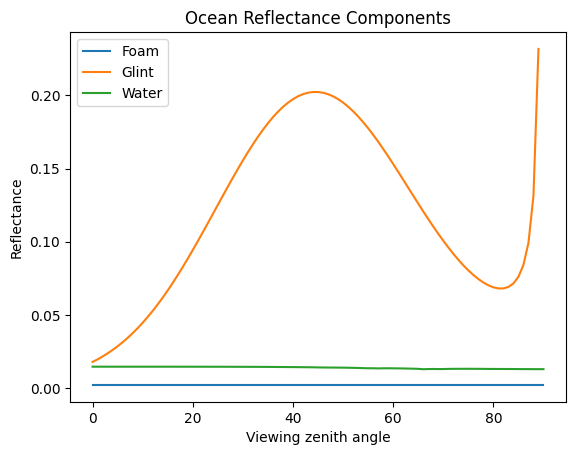

In [87]:
# Plot the results
import matplotlib.pyplot as plt

visualization_index = 0


plt.plot(outgoing_zeniths, [results[zenith] for zenith in outgoing_zeniths])

plt.xlabel('Viewing zenith angle')
plt.ylabel('Reflectance')
plt.title('Ocean Reflectance Components')
plt.legend(['Foam', 'Glint', 'Water', 'Total'])
plt.show()

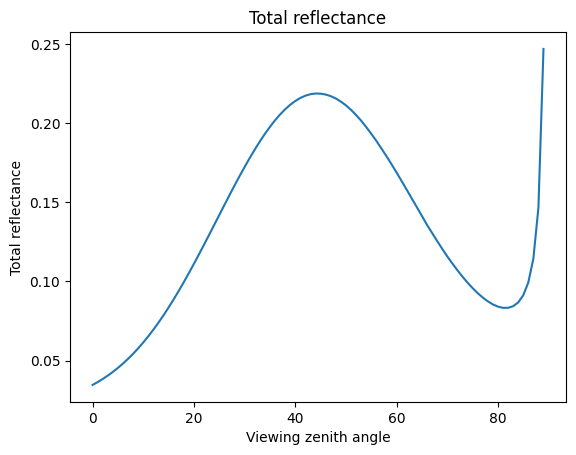

In [88]:
# Plot the total reflectance
plt.plot(outgoing_zeniths, [total_reflectance[zenith] for zenith in outgoing_zeniths])

plt.xlabel('Viewing zenith angle')
plt.ylabel('Total reflectance')
plt.title('Total reflectance')
plt.show()

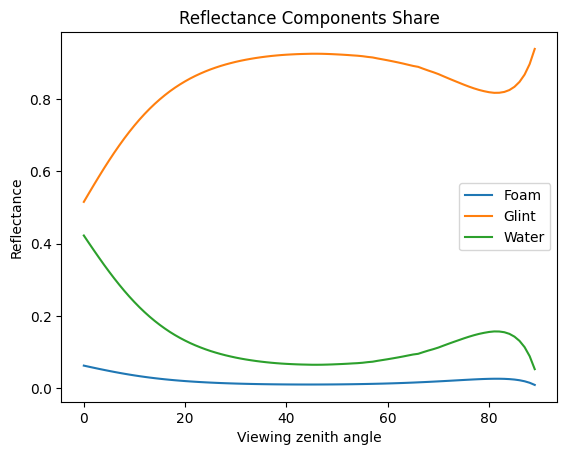

In [89]:
# Plot the percentages
plt.plot(outgoing_zeniths, [percentages[zenith] for zenith in outgoing_zeniths])

plt.xlabel('Viewing zenith angle')
plt.ylabel('Reflectance')
plt.title('Reflectance Components Share')
plt.legend(['Foam', 'Glint', 'Water'])
plt.show()